# User Review Category Classifier

Developed with Scikit-learn, Pandas, etc.

Based on the following [tutorial](https://www.youtube.com/watch?v=M9Itm95JzL0), from Keith Galli.

Reviews retrieved from the following [Amazon user reviews dataset](https://nijianmo.github.io/amazon/index.html).

### 1. Load Data

In [19]:
import pandas as pd
import numpy as np

# Define existing labels
labels = ["BOOKS", "CLOTHING", "ELECTRONICS", "GROCERY", "PATIO"]

# Load all datasets
df_books = pd.read_json("./data/category/Books.json")
df_clothing = pd.read_json("./data/category/Clothing.json")
df_electronics = pd.read_json("./data/category/Electronics.json")
df_grocery = pd.read_json("./data/category/Grocery.json")
df_patio = pd.read_json("./data/category/Patio.json")

# Add label to identify each category
df_books["category"] = "BOOKS"
df_clothing["category"] = "CLOTHING"
df_electronics["category"] = "ELECTRONICS"
df_grocery["category"] = "GROCERY"
df_patio["category"] = "PATIO"

# Join datasets to a single one
raw_df = pd.concat([df_books, df_clothing, df_electronics, df_grocery, df_patio], ignore_index=True)
raw_df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category
0,A1E5ZR1Z4OQJG,1495329321,"Pure Jonel ""Pure Jonel""","[0, 0]",Da Silva takes the divine by storm with this u...,4,An amazing first novel,1396137600,"03 30, 2014",BOOKS
1,A30PZPI6FPH0A7,0399157565,Jackmollie,"[0, 0]",For me personally it's the most disappointing ...,2,disappointed,1400112000,"05 15, 2014",BOOKS
2,A1GQ2UI5BKCCRD,0984528105,Gail Hodges,"[0, 0]","Very simple book, but leaves you feeling good....",4,Good book,1401235200,"05 28, 2014",BOOKS
3,A2DF4LQQI6KSQ2,0804139024,Olga,"[0, 0]",I read a library copy of this exceptionally we...,5,Science Fiction at its best!,1396483200,"04 3, 2014",BOOKS
4,A1UAMAWY966P2,0765317583,Nadyne M Ichimura,"[0, 0]",With the government knowing this could happen ...,5,Excellent story,1397001600,"04 9, 2014",BOOKS
...,...,...,...,...,...,...,...,...,...,...
4995,A1BK60GZ4QME6I,B00GVL015Q,John W. Graham,"[0, 0]",My biggest issue with having a hummingbird fee...,4,Attractive - well liked,1401840000,"06 4, 2014",PATIO
4996,ASJZT7DM51QEM,B00GSQ6HXO,"Patrick Holt ""txdragon""","[0, 0]",So far this feeder seems to work well. The we...,4,works well,1400025600,"05 14, 2014",PATIO
4997,A1P043IW9XANEZ,B000BX1H76,"Texas Steve ""Texas Steve""","[0, 0]",I bought this to trap some feral cats. It work...,5,Trap those feral cats!!,1403654400,"06 25, 2014",PATIO
4998,A19VW07IUHNV1R,B00GTDIDBU,Amazon Customer,"[0, 0]",I used this to seed start a whole lot of morni...,5,Nice mix,1401148800,"05 27, 2014",PATIO


In [21]:
# Filter necessary columns
df = raw_df[["reviewText", "category"]]
df

,reviewText,category
0,Da Silva takes the divine by storm with this u...,BOOKS
1,For me personally it's the most disappointing ...,BOOKS
2,"Very simple book, but leaves you feeling good....",BOOKS
3,I read a library copy of this exceptionally we...,BOOKS
4,With the government knowing this could happen ...,BOOKS
...,...,...
4995,My biggest issue with having a hummingbird fee...,PATIO
4996,So far this feeder seems to work well. The we...,PATIO
4997,I bought this to trap some feral cats. It work...,PATIO
4998,I used this to seed start a whole lot of morni...,PATIO


### 2. Prepare Data

In [22]:
# Split data into training and test set
from sklearn.model_selection import train_test_split

split_seed = 10
train, test = train_test_split(df, test_size=0.33, random_state=split_seed)

print("Training Set Length:", len(train))
print("Test Set Length:", len(test))

Training Set Length: 3350
Test Set Length: 1650


In [23]:
# Seperate features from labels
train_x = train[["reviewText"]]
train_y = train[["category"]]

test_x = test[["reviewText"]]
test_y = test[["category"]]

### 3. Text Vectorization

In [24]:
# Tokenize text into bags of words
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x["reviewText"].values.astype('U'))
test_x_vectors = vectorizer.transform(test_x["reviewText"].values.astype('U'))

### 4. Training

#### 4.1. Linear SVM

In [36]:
from sklearn import svm

clf_svm = svm.SVC(kernel="linear")

clf_svm.fit(train_x_vectors, train_y.values.ravel())

test_review = test_x.iloc[0].values[0]
clf_svm_prediction = clf_svm.predict(test_x_vectors[0])

print("Test Review:", test_review)
print("Prediction:", clf_svm_prediction[0])

Test Review: So glad this installment finally published. Love me some Melody Anne, I'm sad to think that Joseph Anderson May be out of single men to set up!
Prediction: BOOKS


#### 4.2. Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier()

clf_tree.fit(train_x_vectors, train_y.values.ravel())

test_review = test_x.iloc[0].values[0]
clf_tree_prediction = clf_tree.predict(test_x_vectors[0])

print("Test Review:", test_review)
print("Prediction:", clf_tree_prediction[0])

Test Review: So glad this installment finally published. Love me some Melody Anne, I'm sad to think that Joseph Anderson May be out of single men to set up!
Prediction: CLOTHING


#### 4.3. Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB

clf_nb = GaussianNB()

clf_nb.fit(train_x_vectors.toarray(), train_y.values.ravel())

test_review = test_x.iloc[0].values[0]
clf_nb_prediction = clf_nb.predict(test_x_vectors[0].toarray())

print("Test Review:", test_review)
print("Prediction:", clf_nb_prediction[0])

Test Review: So glad this installment finally published. Love me some Melody Anne, I'm sad to think that Joseph Anderson May be out of single men to set up!
Prediction: BOOKS


#### 4.4. Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression(max_iter=1000)

clf_log.fit(train_x_vectors, train_y.values.ravel())

test_review = test_x.iloc[0].values[0]
clf_log_prediction = clf_log.predict(test_x_vectors[0])

print("Test Review:", test_review)
print("Prediction:", clf_log_prediction[0])

Test Review: So glad this installment finally published. Love me some Melody Anne, I'm sad to think that Joseph Anderson May be out of single men to set up!
Prediction: BOOKS


### 5. Evaluation

In [40]:
accuracies = [
    ["SVM", clf_svm.score(test_x_vectors, test_y)],
    ["Decision Tree", clf_tree.score(test_x_vectors, test_y)],
    ["Naive Bayes", clf_nb.score(test_x_vectors.toarray(), test_y)],
    ["Logistic Regression", clf_log.score(test_x_vectors, test_y)],
]

pd.DataFrame(data=accuracies, columns=["Classifier", "Accuracy"])

,Classifier,Accuracy
0,SVM,0.927879
1,Decision Tree,0.707273
2,Naive Bayes,0.806667
3,Logistic Regression,0.920000


In [41]:
from sklearn.metrics import f1_score

f1_svm = f1_score(test_y, clf_svm.predict(test_x_vectors), average=None, labels=labels)
f1_tree = f1_score(test_y, clf_tree.predict(test_x_vectors), average=None, labels=labels)
f1_nb = f1_score(test_y, clf_nb.predict(test_x_vectors.toarray()), average=None, labels=labels)
f1_log = f1_score(test_y, clf_log.predict(test_x_vectors), average=None, labels=labels)

f1_scores = [
    ["SVM", f1_svm[0], f1_svm[1], f1_svm[2], f1_svm[3], f1_svm[4]],
    ["Decision Tree", f1_tree[0], f1_tree[1], f1_tree[2], f1_tree[3], f1_tree[4]],
    ["Naive Bayes", f1_nb[0], f1_nb[1], f1_nb[2], f1_nb[3], f1_nb[4]],
    ["Logistic Regression", f1_log[0], f1_log[1], f1_log[2], f1_log[3], f1_log[4]],
]

pd.DataFrame(data=f1_scores, columns=["Classifier", "F1(Books)", "F1(Clothing)", "F1(Electronics)", "F1(Grocery)", "F1(Patio)"])

,Classifier,F1(Books),F1(Clothing),F1(Electronics),F1(Grocery),F1(Patio)
0,SVM,0.979332,0.902680,0.886536,0.952978,0.923077
1,Decision Tree,0.913386,0.684358,0.572289,0.718028,0.657233
2,Naive Bayes,0.853968,0.751189,0.796899,0.824675,0.807198
3,Logistic Regression,0.976153,0.897328,0.882530,0.946372,0.903323


<AxesSubplot:>

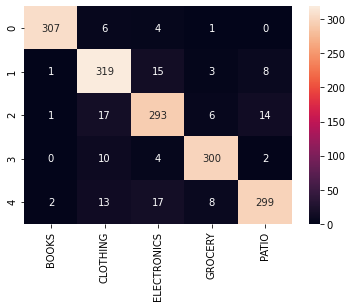

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib as plt

predictions = clf_log.predict(test_x_vectors)

cm = confusion_matrix(test_y, predictions, labels=labels)
df_cm = pd.DataFrame(cm, columns=labels)

sn.heatmap(df_cm, annot=True, fmt="d")

### 6. Improvements

#### 6.1. Check if the number of labels is even

In [33]:
# Count labels in each set
train_count = train_y.value_counts("category")
test_count = test_y.value_counts("category")

print("Label counts in Training Set:\n", train_count, "\n")
print("Label counts in Test Set:\n", test_count)

# Unlike the feedback dataset, the number of examples for each category is relatively even

Label counts in Training Set:
 category
GROCERY        684
BOOKS          682
ELECTRONICS    669
PATIO          661
CLOTHING       654
dtype: int64 

Label counts in Test Set:
 category
CLOTHING       346
PATIO          339
ELECTRONICS    331
BOOKS          318
GROCERY        316
dtype: int64


#### 6.2. Prioritize certain tokens
After running this improvement, run everything from section 4 and 5 to get the new results

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x["reviewText"].values.astype('U'))
test_x_vectors = vectorizer.transform(test_x["reviewText"].values.astype('U'))

#### 6.3. Apply Grid Search
After running this improvement, run everything from section 4 and 5 to get the new results

In [25]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "kernel": ("linear", "rbf"),
    "C": (1,4,8,16,32)
}

svc = svm.SVC()
tuned_clf = GridSearchCV(svc, parameters, cv=5)
tuned_clf.fit(train_x_vectors, train_y.values.ravel())

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': (1, 4, 8, 16, 32), 'kernel': ('linear', 'rbf')})

### 7. Testing

In [49]:
new_examples = [
    "Man, Tolstoi's writing is fantastic", 
    "These jeans are very low quality, would not recommend", 
    "The new Playstation is fantastic",
    "Gotta love these chips",
    "Best grill I ever bought"
]

vectorized_examples = vectorizer.transform(new_examples)

clf_svm.predict(vectorized_examples)

array(['BOOKS', 'CLOTHING', 'ELECTRONICS', 'GROCERY', 'PATIO'],
      dtype=object)

### 8. Model Persistence

#### 8.1. Saving Model

In [50]:
import pickle

with open("./models/category_classifier.pkl", "wb") as f:
    pickle.dump(clf_svm, f)

#### 8.2. Loading Model

In [51]:
with open("./models/category_classifier.pkl", "rb") as f:
    loaded_clf = pickle.load(f)